In [1]:
# If you run this notebook on Google Colaboratory, uncomment the below to install automl_alex.
%pip install -q -U automl_alex
%pip install -q -U metricsreport

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import automl_alex
import sklearn
import pandas as pd
import time
from automl_alex import DataPrepare
from automl_alex import AutoML, AutoMLClassifier, AutoMLRegressor
print('AutoML-Alex version:', automl_alex.__version__)

/root/anaconda3/envs/automl_py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AutoML-Alex version: 2023.3.11


In [3]:
RANDOM_SEED = 42

# Classifier

## Data

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# https://www.openml.org/d/31
dataset = fetch_openml(data_id=31, as_frame=True)
dataset.target = dataset.target.astype('category').cat.codes
dataset.data.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes


In [5]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, 
                                                    dataset.target,
                                                    test_size=0.25, 
                                                    random_state=RANDOM_SEED,)
X_train.shape, X_test.shape

((750, 20), (250, 20))

## AutoML

In [6]:
model = AutoMLClassifier(random_state=RANDOM_SEED,)
model.fit(X_train, y_train, timeout=600)

19:36:58 | > Start Fit Base Model
19:37:01 | ##################################################
19:37:01 | > Start Fit Models 2
19:37:01 | ##################################################
19:37:01 | ##################################################
19:37:01 | > Step 1: calc parameters and pruned score: get test 10 trials
19:37:29 |  One iteration ~ 2.8 sec
19:37:29 |  Possible iters ~ 169.0
19:37:29 | --------------------------------------------------
19:37:29 |   Pruned Threshold Score: 0.7237
19:37:29 | ##################################################
19:37:29 | > Step 2: Full opt with Threshold Score Pruner
19:37:29 | ##################################################
19:37:29 | > Start optimization with the parameters:
19:37:29 | CV_Folds = 7
19:37:29 | Score_CV_Folds = 3
19:37:29 | Feature_Selection = True
19:37:29 | Opt_lvl = 2
19:37:29 | Cold_start = 20
19:37:29 | Early_stoping = 30
19:37:29 | Metric = roc_auc_score
19:37:29 | Direction = maximize
19:37:29 | ###############

In [7]:
predicts = model.predict(X_test)

In [8]:
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts),4))

Test AUC:  0.7957


Detecting classification task type
threshold=0.5

                  |  Classification Report | 

              precision    recall  f1-score   support

     Class 0       0.69      0.46      0.55        72
     Class 1       0.81      0.92      0.86       178

    accuracy                           0.78       250
   macro avg       0.75      0.69      0.70       250
weighted avg       0.77      0.78      0.77       250


                  |  Metrics Report: | 

                      score
AUC                  0.7957
Log Loss             0.4786
Average_Precision    0.8997
Accuracy             0.7840
Precision            0.7725
Recall               0.7840
F1 Score             0.7692
MCC                  0.4301
TN                  33.0000
FP                  39.0000
FN                  15.0000
TP                 163.0000

                  |  Lift: | 

     target_cnt  cnt  target_cnt_cum  cnt_cum  target_share  target_share_cum  \
top                                                      

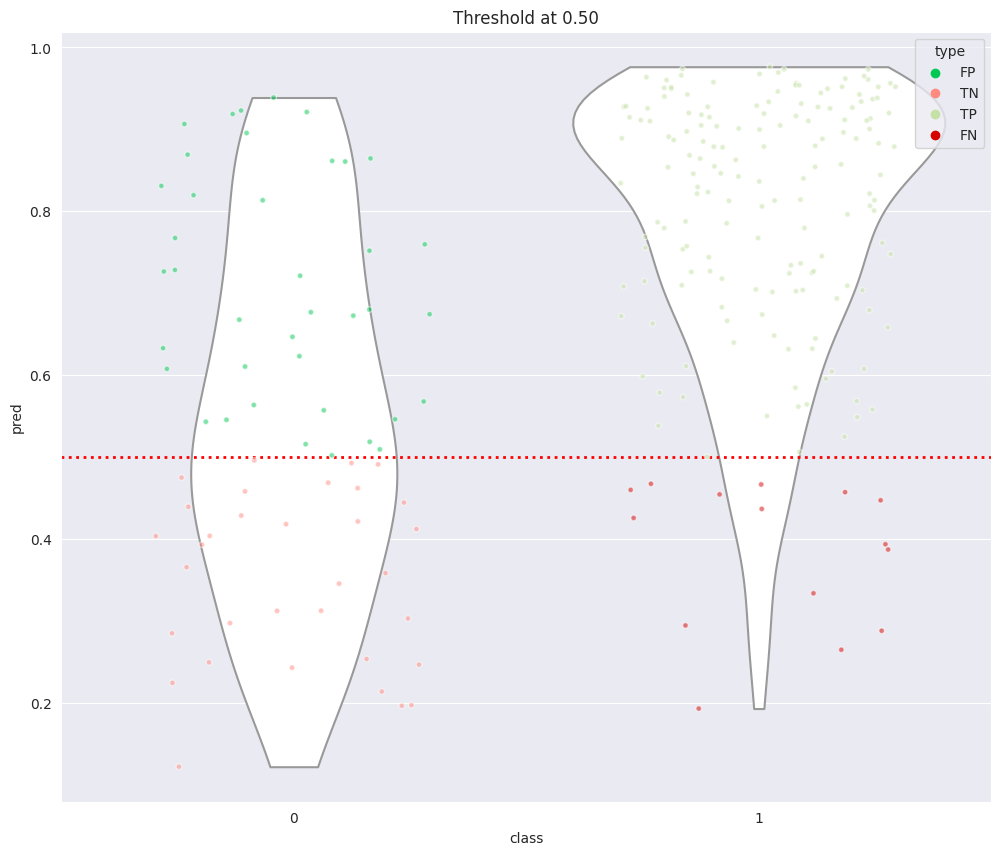

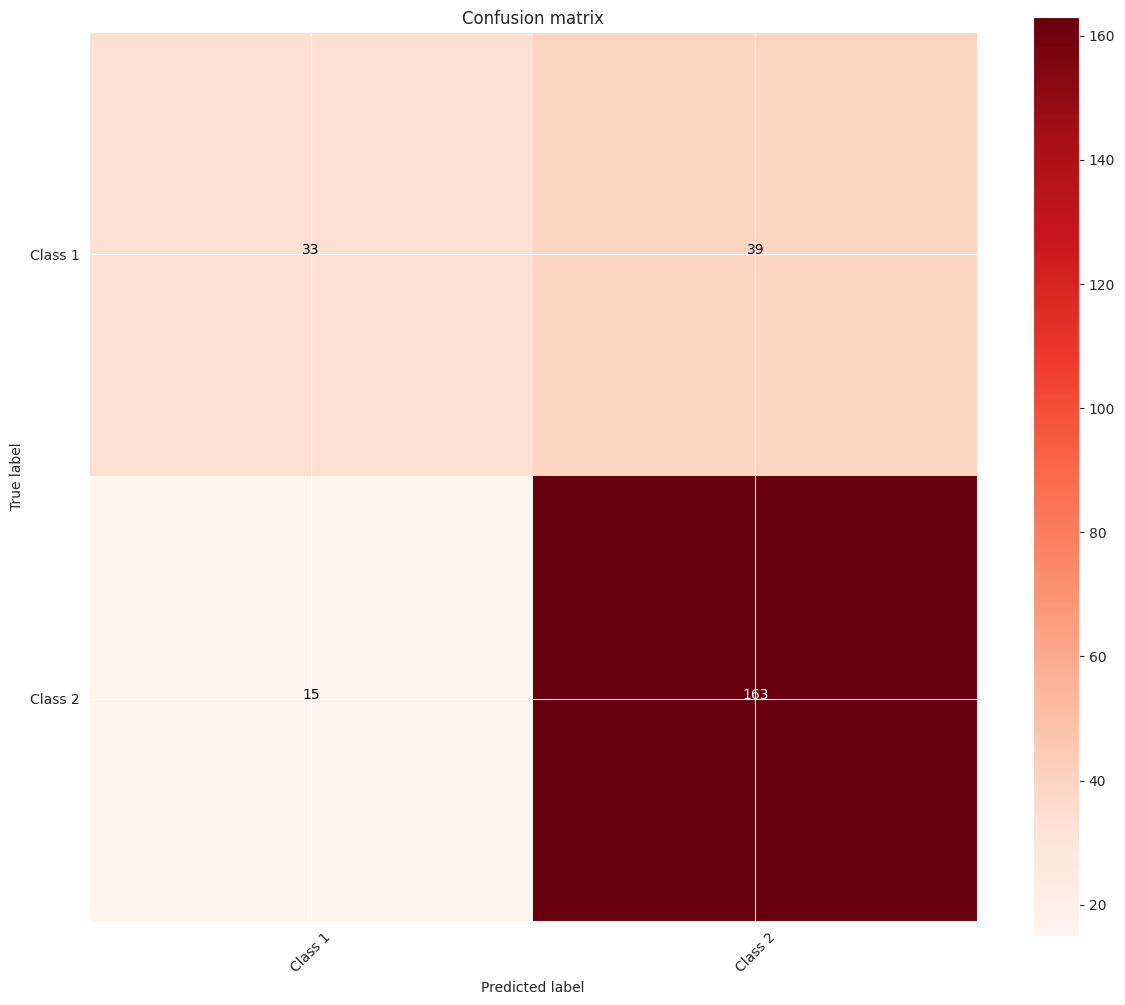

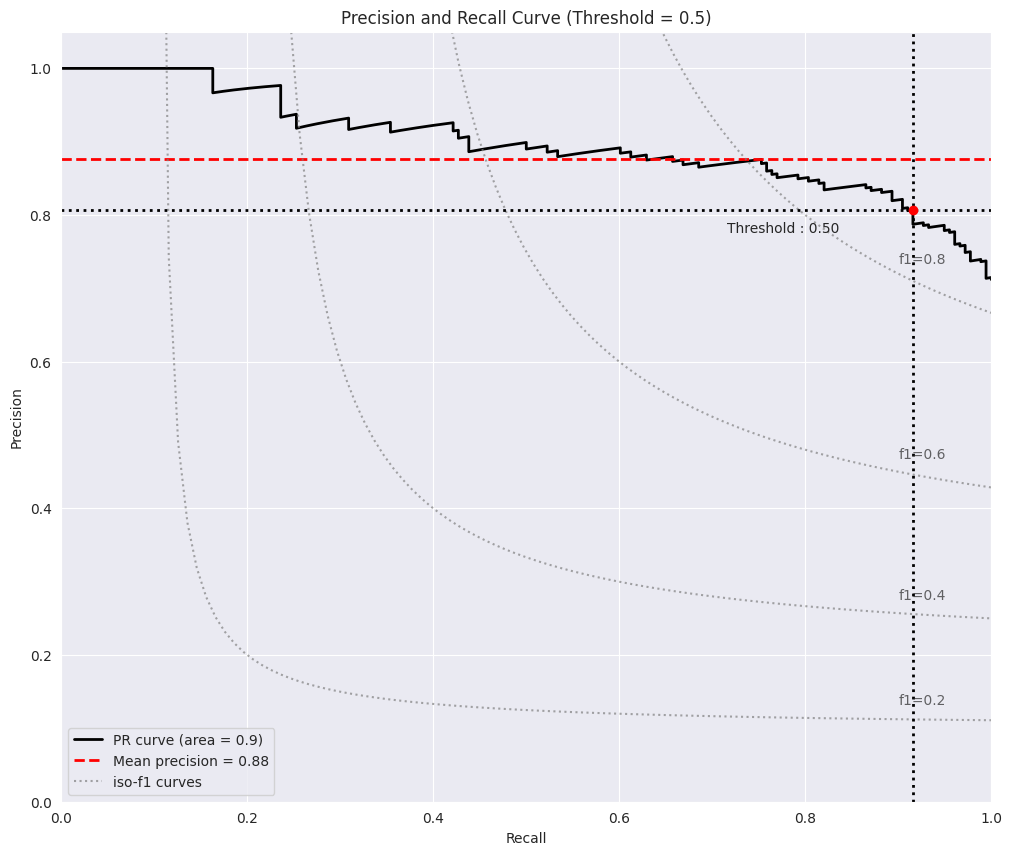

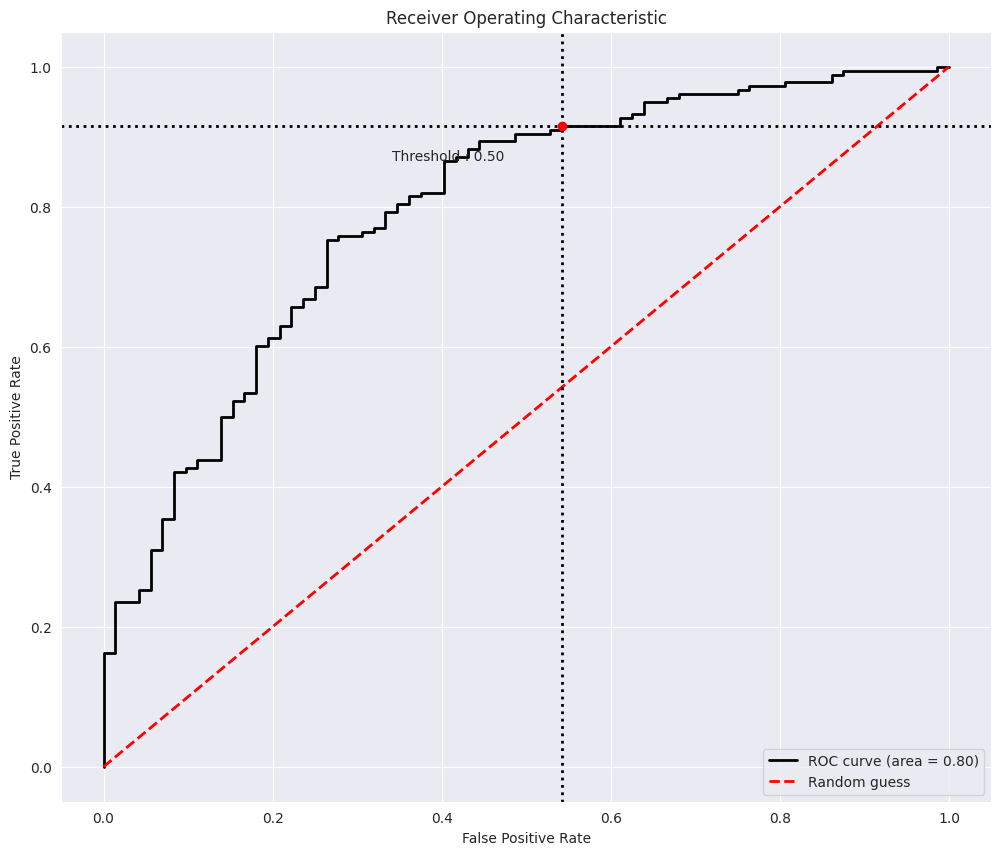

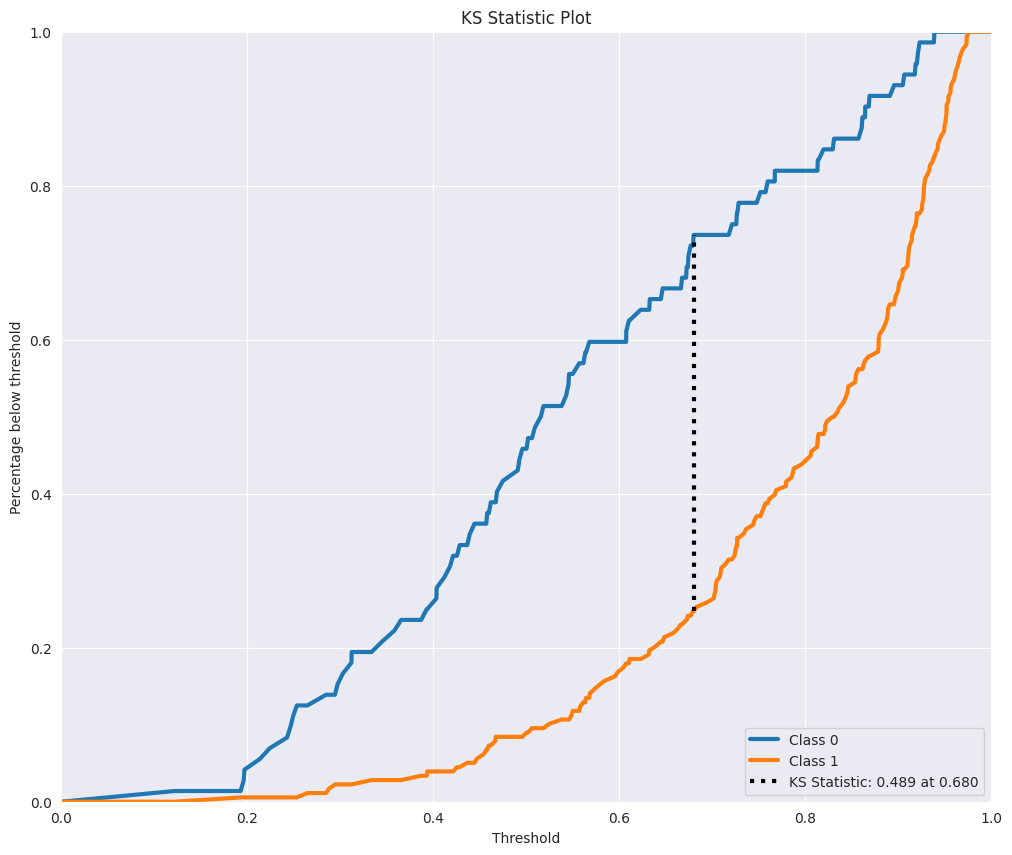

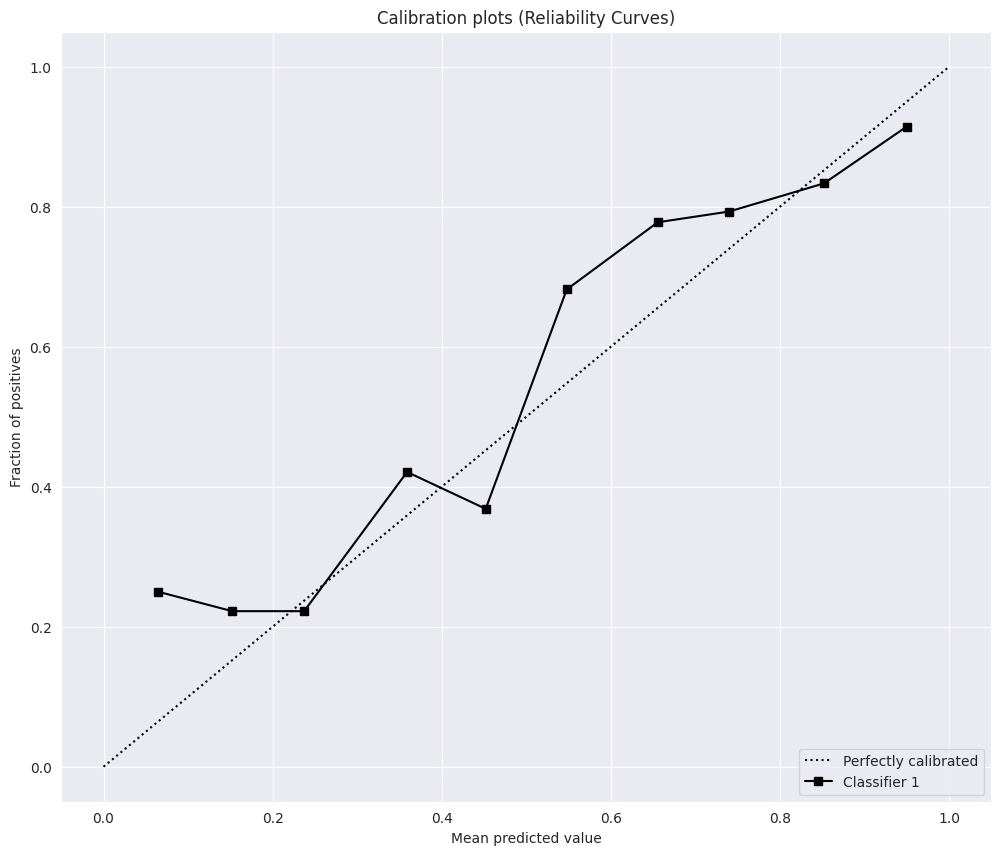

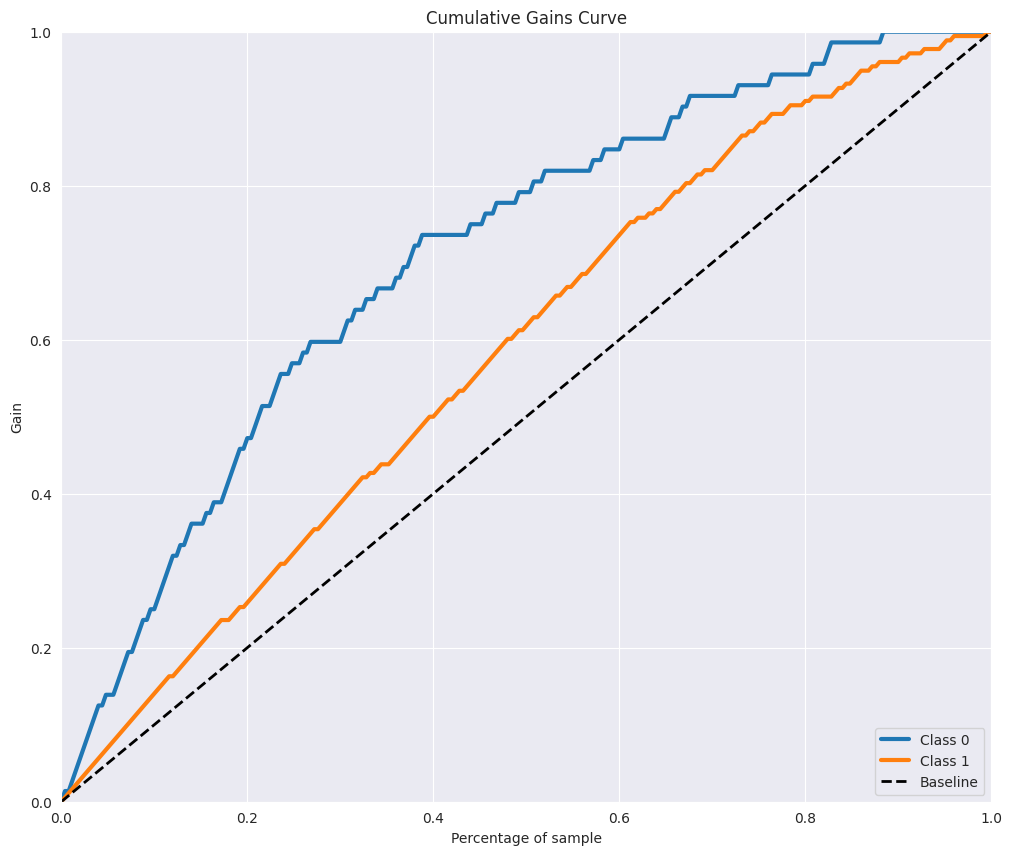

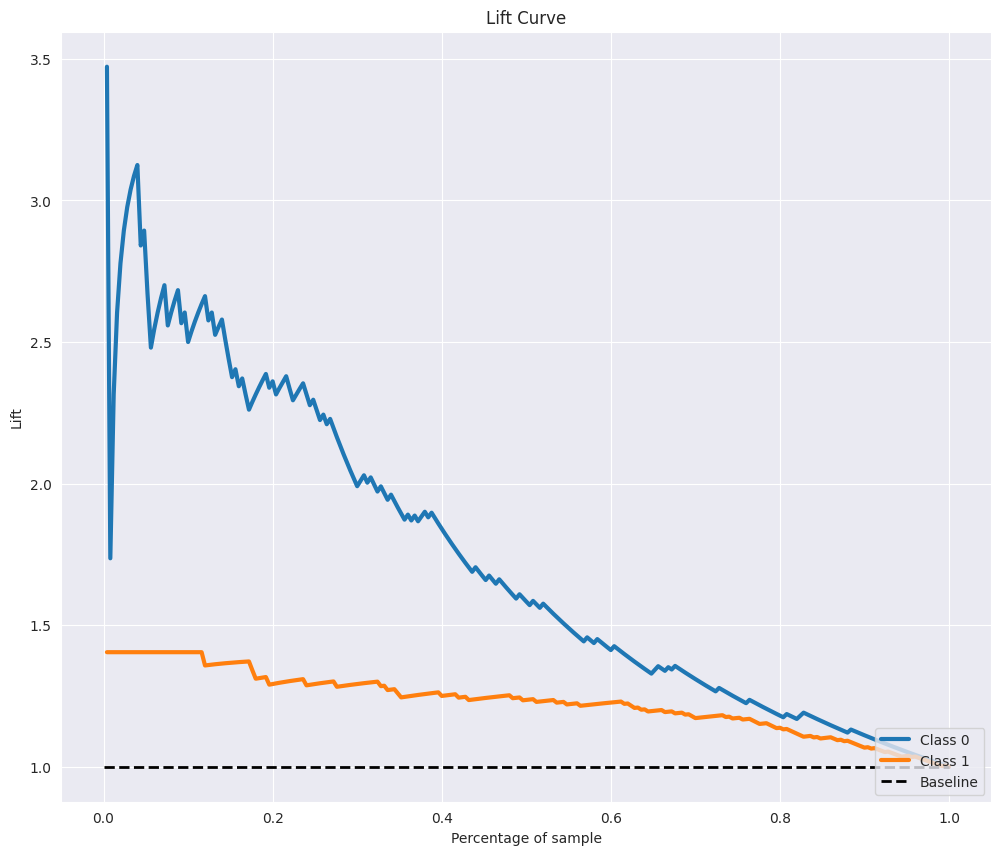

In [9]:
from metricsreport import MetricsReport  
# generate report 
report = MetricsReport(y_test, predicts, threshold=0.5)  
# print all metrics 
report.print_report()

## Save & Load

In [10]:
model.save('AutoML_model_1')

Save model


In [11]:
model_new = AutoMLClassifier(random_state=RANDOM_SEED,)
model_new = model_new.load('AutoML_model_1')

19:45:45 | Load AutoML


In [12]:
predicts = model_new.predict(X_test)
print('Test AUC: ', round(sklearn.metrics.roc_auc_score(y_test, predicts),4))

Test AUC:  0.7957


# Regression

## Data

In [13]:
# https://www.openml.org/d/543
dataset = fetch_openml(data_id=543, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(dataset.data), 
                                                    pd.DataFrame(dataset.target), 
                                                    test_size=0.15, 
                                                    random_state=RANDOM_SEED,)

X_train.shape, X_test.shape

((430, 19), (76, 19))

In [14]:
X_train.head(5)

,TOWN,TOWN_ID,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B
104,Medford,24,3395,-71.0690,42.2480,20.1,20.1,0.13960,0.0,8.56,0,0.5200,6.167,90.0,2.4210,5,384,20.9,392.69
203,Weston,37,3671,-71.1990,42.2320,48.5,48.5,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78
381,Boston_East_Boston,79,407,-71.0410,42.2290,10.9,10.9,15.87440,0.0,18.10,0,0.6710,6.545,99.1,1.5192,24,666,20.2,396.90
489,Chelsea,89,1602,-71.0228,42.2335,7.0,7.0,0.18337,0.0,27.74,0,0.6090,5.414,98.3,1.7554,4,711,20.1,344.05
69,Wilmington,16,3313,-71.1110,42.3270,20.9,20.9,0.12816,12.5,6.07,0,0.4090,5.885,33.0,6.4980,4,345,18.9,396.90


In [15]:
y_train

,LSTAT
104,12.33
203,3.81
381,21.08
489,23.97
69,8.79
...,...
106,18.66
270,13.00
348,5.99
435,23.27


## AutoML

In [16]:
model = AutoMLRegressor(random_state=RANDOM_SEED,)
model.fit(X_train, y_train, timeout=300,)

19:45:50 | > Start Fit Base Model
19:45:50 | ! Not enough time to find the optimal parameters. 
                     Please, Increase the 'timeout' parameter for normal optimization. (min 600 sec)
19:45:51 | ##################################################
19:45:51 | > Start Fit Models 2
19:45:51 | ##################################################
19:45:51 | ##################################################
19:45:52 | > Step 1: calc parameters and pruned score: get test 10 trials
19:46:00 |  One iteration ~ 0.8 sec
19:46:00 |  Possible iters ~ 220.0
19:46:00 | --------------------------------------------------
19:46:00 |   Pruned Threshold Score: 30.8768
19:46:00 | ##################################################
19:46:00 | > Step 2: Full opt with Threshold Score Pruner
19:46:00 | ##################################################
19:46:00 | > Start optimization with the parameters:
19:46:00 | CV_Folds = 7
19:46:00 | Score_CV_Folds = 3
19:46:00 | Feature_Selection = True
19:46:00

In [17]:
predicts = model.predict(X_test)
print('Test MSE: ', round(sklearn.metrics.mean_squared_error(y_test, predicts),4))

Test MSE:  6.6822


Detecting regression task type

                  |  Metrics Report: | 

                                  score
Mean Squared Error               6.6822
Mean Squared Log Error           0.0415
Mean Absolute Error              2.0046
R^2                              0.8639
Explained Variance Score         0.8649
Max Error                        8.3250
Mean Absolute Percentage Error  18.8000

                  |  Plots: | 



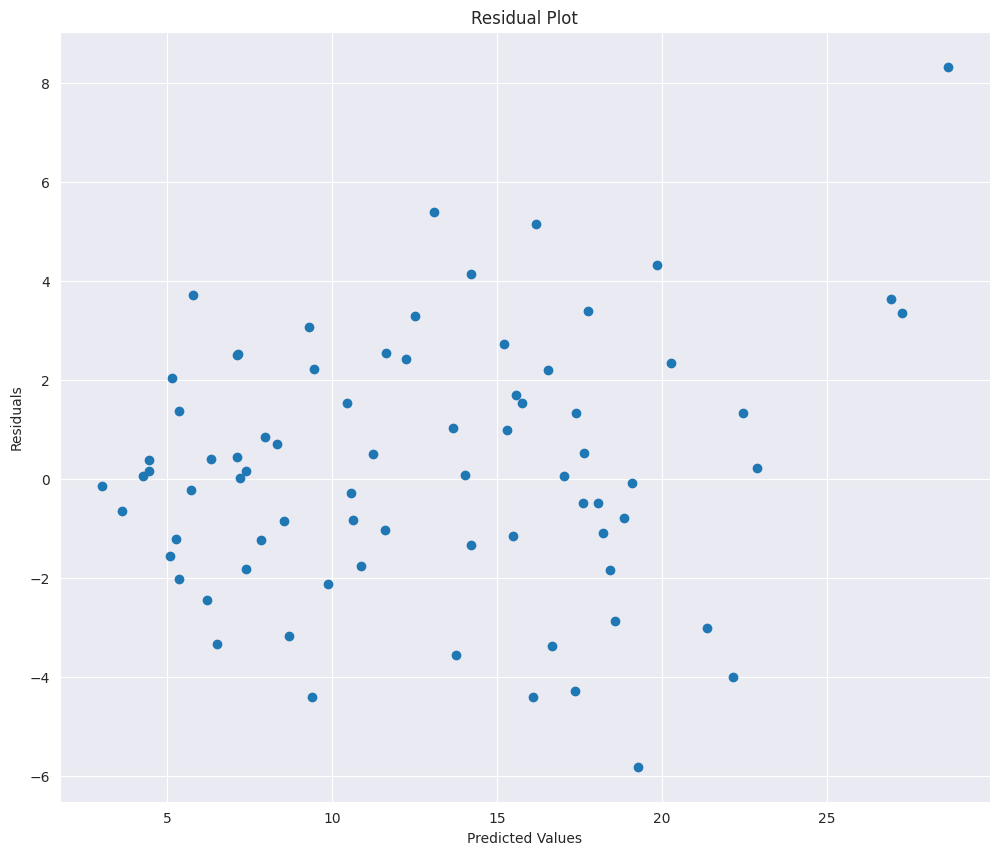

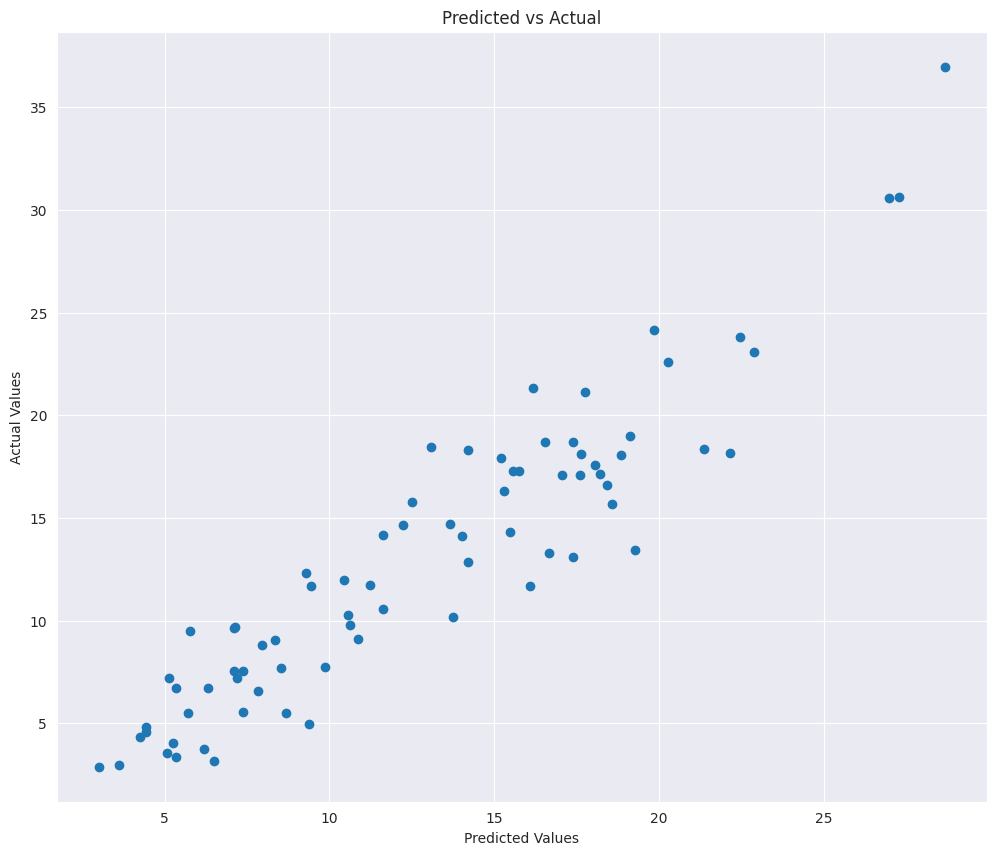

In [18]:
from metricsreport import MetricsReport  
# generate report 
report = MetricsReport(y_test['LSTAT'].values, predicts,)  
# print all metrics 
report.print_report()